In [1]:
# Some magic to make plots appear within the notebook
%matplotlib inline
import numpy as np # In case we need to use numpy

In [2]:
from pymt.components import Sedflux3D, Child

child = Child()
sedflux = Sedflux3D()

child_in, child_dir = child.setup('_child',
                                  grid_node_spacing=500.,
                                  grid_x_size=40000.,
                                  grid_y_size=20000.,
                                  run_duration=1e6)
sedflux_in, sedflux_dir = sedflux.setup('_sedflux',
                                        river_bed_load_flux=0.,
                                        river_suspended_load_concentration_0=.001,
                                        river_suspended_load_concentration_1=.001,
                                        run_duration=1e6 * 365.)

child.initialize(child_in, dir=child_dir)
sedflux.initialize(sedflux_in, dir=sedflux_dir)

/Users/huttone/git/mcflugen/pymt-demo/conda/lib/python2.7/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


RuntimeError: babel: Unable to find or load a shared library containing the implementation of SIDL type csdms.Sedflux3D. To get more debugging information trying setting the SIDL_DEBUG_DLOPEN environment variable and rerunning.

In [3]:
gid = child.var['land_surface__elevation'].grid
x, y = child.get_grid_x(gid), child.get_grid_y(gid)
z = child.get_value('land_surface__elevation')

In [4]:
x_shore = 20000.
z[np.where(x > x_shore)] += 100.
z[np.where(x <= x_shore)] -= 100.

child.set_value('land_surface__elevation', z)

In [5]:
sedflux.set_value('bedrock_surface__elevation', mapfrom=('land_surface__elevation', child))

/Users/huttone/git/mcflugen/pymt-demo/conda/lib/python2.7/site-packages/ESMF/api/mesh.py:588: UserWarning: Mesh element coordinates are not available
  warnings.warn("Mesh element coordinates are not available")


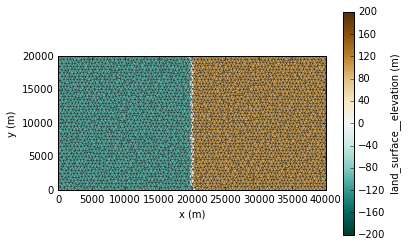

In [6]:
child.quick_plot('land_surface__elevation', edgecolors='k', vmin=-200, vmax=200, cmap='BrBG_r')

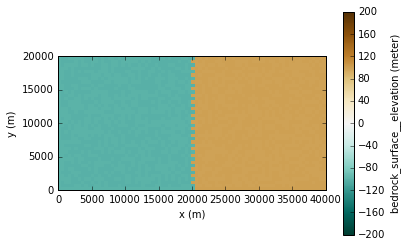

In [7]:
sedflux.quick_plot('bedrock_surface__elevation', vmin=-200, vmax=200, cmap='BrBG_r')

In [20]:
now = child.get_current_time()
times = np.arange(now, now + 100, 1.)
for t in times:
    child.update_until(t, units='years')

    sedflux.set_value('channel_water_sediment~bedload__mass_flow_rate',
                      mapfrom=child)
    sedflux.update_until(t, units='years')
    
    z = child.get_value('land_surface__elevation')
    child.set_value('land_surface__elevation',
                    mapfrom=('land-or-seabed_sediment_surface__elevation', sedflux),
                    nomap=np.where(z>0.))

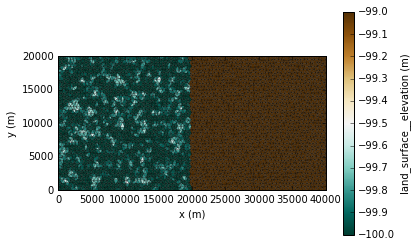

In [26]:
child.quick_plot('land_surface__elevation', edgecolors='k', vmin=-100, vmax=-99, cmap='BrBG_r')

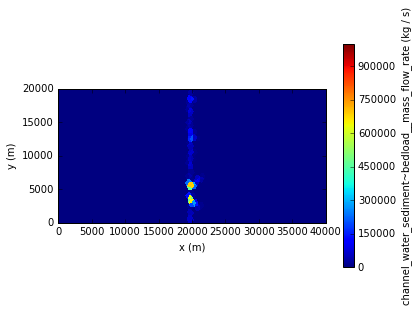

In [17]:
child.quick_plot('channel_water_sediment~bedload__mass_flow_rate', vmax=1e6)

In [14]:
1e6 / (500 * 500.)

4.0

In [23]:
sedflux.output_var_names

('land-or-seabed_sediment_grain__mean_diameter',
 'sea_water__depth',
 'sea_bottom_sediment__bulk_mass-per-volume_density',
 'sea_bottom_surface__elevation',
 'sea_bottom_sediment_grain__mean_diameter',
 'bedrock_surface__elevation',
 'land-or-seabed_sediment__permeability',
 'sediment_grain__mean_diameter',
 'land-or-seabed_sediment_surface__y_derivative_of_elevation',
 'sea_bottom_sediment__porosity',
 'land-or-seabed_sediment_silt__volume_fraction',
 'land-or-seabed_sediment_surface__elevation',
 'land-or-seabed_sediment_clay__volume_fraction',
 'sea_bottom_sediment_mud__volume_fraction',
 'land-or-seabed_sediment_sand__volume_fraction',
 'land-or-seabed_sediment__mean_of_deposition_age',
 'sediment__mean_of_deposition_age',
 'sea_bottom_surface__y_derivative_of_elevation',
 'sea_bottom_sediment_clay__volume_fraction',
 'land-or-seabed_sediment__porosity',
 'land-or-seabed_sediment__bulk_mass-per-volume_density',
 'land-or-seabed_sediment_mud__volume_fraction',
 'land-or-seabed_sedi

In [25]:
sedflux.get_current_time(units='year')

148.00000000014796

In [27]:
cat _sedflux/sedflux_3d_river.kvf

[ 'Season 1' ]
Duration (y):                             1y   
Bedload (kg/s):                           0.0
Suspended load concentration (kg/m^3):    0.001, 0.001
Velocity (m/s):                           1.2
Width (m):                                400.0    
Depth (m):                                4.0



In [29]:
help(sedflux)

Help on Sedflux3D in module pymt.framework.bmi_bridge object:

class Sedflux3D(BmiCap)
 |  Basic Model Interface for Sedflux3D.
 |  
 |  Sedflux3D is a basin filling stratigraphic model. Sedflux3d simulates
 |  long-term marine sediment transport and accumulation into a three-
 |  dimensional basin over time scales of tens of thousands of years. It
 |  simulates the dynamics of strata formation of continental margins
 |  based on distribution of river plumes and tectonics.
 |  
 |  Author:
 |  - Eric Hutton
 |  Version: 2.1
 |  License: MIT
 |  DOI: 10.1594/IEDA/100161
 |  URL: http://csdms.colorado.edu/wiki/Model_help:Sedflux
 |  
 |  Cite as:
 |  
 |      @article{hutton2008sedflux,
 |      title={Sedflux 2.0: An advanced process-response model that generates three-dimensional stratigraphy},
 |      author={Hutton, Eric WH and Syvitski, James PM},
 |      journal={Computers \& Geosciences},
 |      volume={34},
 |      number={10},
 |      pages={1319--1337},
 |      year={2008},
 | 